1- importation des packages

In [ ]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


**Authentification à GCP et Configuration du client bigquery**

In [ ]:
# Puis, on configure la connexion pour pouvoir importer les tables.

# Authentification par clef json OU BIEN compte google
# Soit l'un, soit l'autre
auth.authenticate_service_account() # En passant par la clef JSON
#auth.authenticate_user()  # Authentifie l'utilisateur avec son compte Google.


project_id = "databird-2025"  # Identifiant du projet Google Cloud.
dataset_id = "Netflix"  # Identifiant du dataset du projet.


# Crée un client BigQuery pour interagir avec les tables du projet.
client = bigquery.Client(project= project_id)

**Importer les data de la table Userbase et les convertir en dataframe**

In [ ]:
query_test = f"""
      SELECT
        *
      FROM {project_id}.{dataset_id}.Userbase
      ;
      """

df = client.query(query_test).to_dataframe() # On utilise la méthode '.query()' pour que Python puisse interpréter la docstring ci-dessus, puis nous convertissons en dataframe.
display(df)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month


**Vérifier et nettoyer les datas si nécessaires, attention au format date**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   Int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   Int64 
 3   Join Date          2500 non-null   dbdate
 4   Last Payment Date  2500 non-null   dbdate
 5   Country            2500 non-null   object
 6   Age                2500 non-null   Int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: Int64(3), dbdate(2), object(5)
memory usage: 202.8+ KB


In [ ]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df["Join Date"] = pd.to_datetime(df["Join Date"], errors="coerce")
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   Int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   Int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   Int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: Int64(3), datetime64[ns](2), object(5)
memory usage: 202.8+ KB


**Évaluez la corrélation entre l'âge des utilisateurs et le type de subscription. Faire de même pour les types de devices sur lesquels sont visionnés les films. Visualiser dans le notebook**

In [ ]:
df['Device'].unique()

array(['Smartphone', 'Laptop', 'Smart TV', 'Tablet'], dtype=object)

In [ ]:
df['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [ ]:
df["Subscription"] = df["Subscription Type"].replace({"Basic": 1, "Standard": 2, "Premium": 3})
df

<ipython-input-16-4329e6369bfb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Subscription"] = df["Subscription Type"].replace({"Basic": 1, "Standard": 2, "Premium": 3})


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Subscription
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,3
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,3
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,3
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,3
...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,1
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,3
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1


In [ ]:
df["Diffusion"] = df["Device"].replace({"Smartphone": 1, "Laptop": 2, "Smart TV": 3, "Tablet": 4})
df

<ipython-input-18-854aff036409>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Diffusion"] = df["Device"].replace({"Smartphone": 1, "Laptop": 2, "Smart TV": 3, "Tablet": 4})


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Subscription,Diffusion
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,3,2
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,3,1
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,3,3
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,1,1
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,3,1
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2


In [ ]:
# Matrice de corrélation entre les trois colonnes
df_corr = df[['Age', 'Diffusion', 'Subscription']].corr()
df_corr

,Age,Diffusion,Subscription
Age,1.000000,-0.005705,-0.016243
Diffusion,-0.005705,1.000000,0.011051
Subscription,-0.016243,0.011051,1.000000


**Réaliser une heatmap**

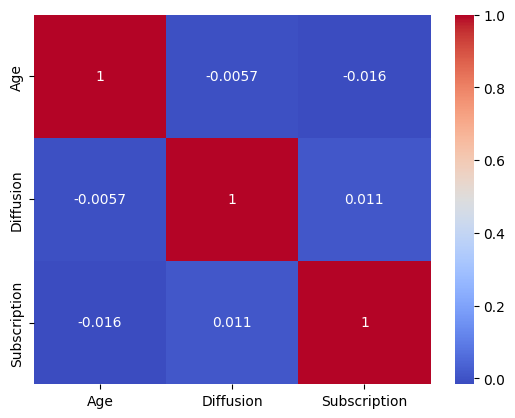

In [ ]:
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

**Classer les clients comme actifs ou inactifs. Pour ce faire, comparez les dates du dernier paiement des abonnés à la date du dernier paiement présente dans le dataset (au format période).**

In [ ]:
last_date = df['Last Payment Date'].dt.to_period('M').max()
df['status'] = df['Last Payment Date'].dt.to_period('M').apply(
    lambda x: 'actif' if x == last_date else 'inactif'
)
print(last_date)
df['status'].value_counts()

2023-07


,count
status,
actif,1634
inactif,866


**Calculer la rétention des utilisateurs par cohorte - Créer les cohortes par Join Date.**

In [ ]:
df_group = df.groupby(df['Join Date'].dt.to_period('M')).agg({'status': lambda x: (x == 'actif').sum() / len(x) * 100 if len(x) > 0 else 0})#.sort_values(by='status', ascending=False).reset_index()
df_group




,Join Date,status
0,2022-07,76.507277
1,2022-10,74.856046
2,2022-11,73.898305
3,2022-09,70.844687
4,2022-08,67.539267
5,2022-06,47.457627
6,2022-02,0.000000
7,2022-01,0.000000
8,2021-12,0.000000
9,2021-11,0.000000


In [ ]:
df_group = df['Join Date'].dt.to_period('M').value_counts().reset_index()
df_group

,Join Date,count
0,2022-10,521
1,2022-07,481
2,2022-08,382
3,2022-09,367
4,2022-06,295
5,2022-11,295
6,2022-05,40
7,2022-12,22
8,2022-04,19
9,2022-03,13
